<h1 align="center">Heart Attack - EDA</h1>

1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Task](#3)
    - 1.3 [Understanding Data](#21)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
5. [Modeling](#15)
    - 5.1 [Linear Classifiers](#16)
    - 5.2 [Tree Models](#17)
    

### 1. Introduction <a id=1></a>

#### 1.1 Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

**Additional Variables Explaination from Kaggle**

**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

    Variable definition can be found in the discussion section

#### 1.2 Task <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

#### 1.3 Understanding Data <a id=21></a>
* What is Heart Attack?





* How does it Happen?




* What are the most contributing Factors for heart attack to happen ?



* symptoms of heart attack for male and female?


### 2. Preparation <a id=4></a>

#### 2.1 Packages <a id=5></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set()

#### 2.2 Data <a id=6></a>

In [2]:
cleavland = pd.read_csv('processed.cleveland.data',encoding='latin1',header=None)
hungarian = pd.read_csv('processed.hungarian.data',encoding='latin1',header=None)
v_data  = pd.read_csv('processed.va.data',encoding='latin1',header=None)
switzerland = pd.read_csv('processed.switzerland.data',encoding = 'latin1',header=None)

In [3]:
column_names  = {
    0:'age',
    1:'sex',
    2:'cp',
    3:'trestbps',
    4:'chol',
    5:'fbs',
    6:'restecg',
    7:'thalach',
    8:'exang',
    9:'oldpeak',
    10:'slope',
    11:'ca',
    12:'thal',
    13:'target'
}

In [4]:
heart_df = pd.concat([cleavland,hungarian,v_data,switzerland])
heart_df.rename(columns=column_names,inplace=True)

#### 2.3 Understanding Data <a id=7></a>

##### 2.3.1 The shape of the data

In [5]:
heart_df.shape

(920, 14)

##### 2.3.2 Preview of the first 5 rows of the data

In [6]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [8]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 2.3.3 Checking the number of unique values in each column

In [9]:
unique_values = []
for i in heart_df.columns:
    values = heart_df[i].nunique()
    unique_values.append(values)
un_value = pd.DataFrame(data=unique_values,index=heart_df.columns,columns=['Unique Values'])
un_value

,Unique Values
age,50
sex,2
cp,4
trestbps,103
chol,336
fbs,5
restecg,7
thalach,198
exang,5
oldpeak,82


##### 2.3.4 Separating the columns in categorical and continuous

In [44]:
numeric_var = ["age","trestbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

##### 2.3.5 Summary statistics

In [11]:
heart_df[numeric_var].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,920,103,120,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,920.0,336.0,0.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,920,198,?,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,920.0,82.0,0.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It is clear that the data above cannot be included in Summary statistics  as there are non numeric values in the data. further exploreation is a must prior proceeding with the case.

##### 2.3.6 Missing values

In [12]:
for column in heart_df.columns:
    print(column)
    print(heart_df[column].unique())
    print("value count for ? vaue")
    print((heart_df[column]=='?').sum())
    print("="*30)
    


age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 28. 30. 31. 32. 33. 36. 72. 75. 73.]
value count for ? vaue
0
sex
[1. 0.]
value count for ? vaue
0
cp
[1. 4. 3. 2.]
value count for ? vaue
0
trestbps
[145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '130' '120' '140' '170' '100' '105' '110' '125' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '126' '152'
 '116' '0' '144' '154' '104' '134' '178' '146' '158' '102' '96' '172'
 '156' '114' '127' '95' '165' '80' '185']
value count for ? vaue
59
chol
[233.0 286.0 229.0 250.0 204.0

In [13]:
heart_df1 = heart_df[heart_df['ca']!='?']

In [14]:
heart_df1.shape

(309, 14)

In [15]:
for column in heart_df1.columns:
    print(column)
    print(heart_df1[column].unique())
    print("value count for ? vaue")
    print((heart_df1[column]=='?').sum())
    print("="*30)
    


age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 72.]
value count for ? vaue
0
sex
[1. 0.]
value count for ? vaue
0
cp
[1. 4. 3. 2.]
value count for ? vaue
0
trestbps
[145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '120' '140' '150' '154' '110' '125' '130' '160']
value count for ? vaue
0
chol
[233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0 206.0
 219.0 340.0 226.0 247.0 167.0 230.0 335.0 234.0 177.0 276.0 353.0 243.0
 225.0 302.0 212.0 330.0 175.0 417.0 197.0 198.0 290.0 253.0 172.0 273.0
 213.0 305.0 216.0 304.0 188.0 282.0

In [16]:
heart_df1 = heart_df1[heart_df1['thal']!='?']

In [17]:
for column in heart_df1.columns:
    print(column)
    print(heart_df1[column].unique())
    print("value count for ? vaue")
    print((heart_df1[column]=='?').sum())
    print("="*30)
    


age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
value count for ? vaue
0
sex
[1. 0.]
value count for ? vaue
0
cp
[1. 4. 3. 2.]
value count for ? vaue
0
trestbps
[145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '150' '120']
value count for ? vaue
0
chol
[233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0 206.0
 219.0 340.0 226.0 247.0 167.0 230.0 335.0 234.0 177.0 276.0 353.0 243.0
 225.0 302.0 212.0 330.0 175.0 417.0 197.0 198.0 290.0 253.0 172.0 273.0
 213.0 305.0 216.0 304.0 188.0 282.0 185.0 232.0 326.0 231.0 269.0 267.0
 24

In [25]:
heart_df1.shape

(299, 14)

In [26]:
final_hd=heart_df1

In [28]:
final_hd[numeric_var].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,299.0,NaN,NaN,NaN,54.521739,9.030264,29.0,48.0,56.0,61.0,77.0
trestbps,299.0,52.0,120.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,299.0,154.0,234.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,299.0,93.0,162.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,299.0,41.0,0.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
final_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 28
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    object 
 4   chol      299 non-null    object 
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalach   299 non-null    object 
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    object 
 10  slope     299 non-null    object 
 11  ca        299 non-null    object 
 12  thal      299 non-null    object 
 13  target    299 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 35.0+ KB


In [34]:
final_hd[numeric_var] = final_hd[numeric_var].astype('float64')

In [35]:
final_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 28
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalach   299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    object 
 12  thal      299 non-null    object 
 13  target    299 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 35.0+ KB


In [36]:
final_hd[numeric_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,54.521739,9.030264,29.0,48.0,56.0,61.0,77.0
trestbps,299.0,131.715719,17.747751,94.0,120.0,130.0,140.0,200.0
chol,299.0,246.785953,52.532582,100.0,211.0,242.0,275.5,564.0
thalach,299.0,149.327759,23.121062,71.0,132.5,152.0,165.5,202.0
oldpeak,299.0,1.058528,1.162769,0.0,0.0,0.8,1.6,6.2


In [50]:
final_hd[categorical_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 28
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      299 non-null    float64
 1   cp       299 non-null    float64
 2   fbs      299 non-null    object 
 3   restecg  299 non-null    object 
 4   exang    299 non-null    object 
 5   slope    299 non-null    object 
 6   ca       299 non-null    object 
 7   thal     299 non-null    object 
 8   target   299 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 23.4+ KB


##### Very important step to remove decimals from cetgorical values to be able to plot it and see actual pentration of each category

In [54]:
final_hd[categorical_var]=final_hd[categorical_var].astype('int64')

In [56]:
final_hd[categorical_var] =final_hd[categorical_var].astype('object')

In [57]:
final_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,2
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,3
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1
205,47.0,1,4,150.0,226.0,0,0,98.0,1,1.5,2,0,7,1


### 3. Exploratory Data Analysis <a id=8></a>

#### 3.1 Univariate Analysis <a id=9></a>

##### 3.1.1 Histplot for Numerical Values

<Figure size 864x720 with 0 Axes>

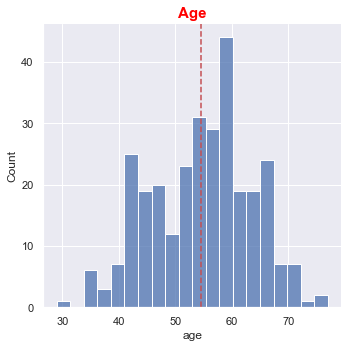

<Figure size 864x720 with 0 Axes>

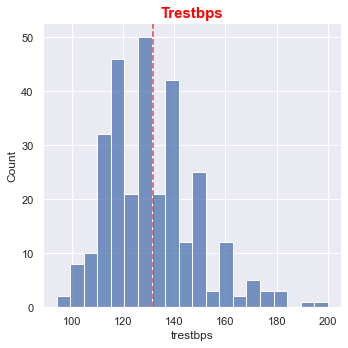

<Figure size 864x720 with 0 Axes>

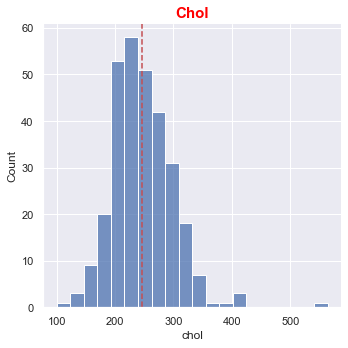

<Figure size 864x720 with 0 Axes>

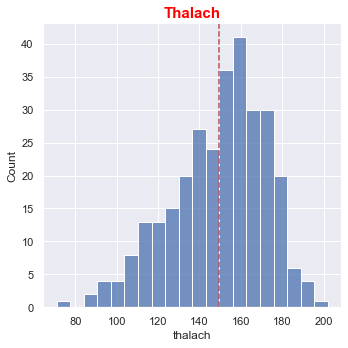

<Figure size 864x720 with 0 Axes>

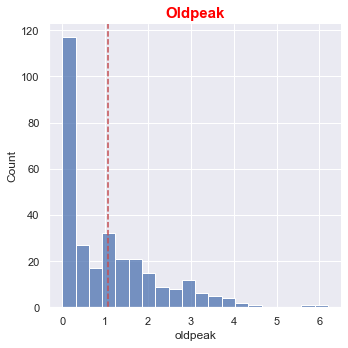

In [58]:
font_dict = {'fontsize': 15,'fontweight': 'bold','color': 'red'}
for item in numeric_var:
    plt.figure(figsize=(12,10))
    sns.displot(final_hd[item],color='b',bins = 20,)
    plt.axvline(final_hd[item].mean(),color='r',ls='--')
    plt.title(item.title(),font_dict)
    plt.tight_layout()
    plt.show()

##### 3.1.2 Pie Charts for Categorical Variable

In [59]:
categoric_axis_name = ['Gender','Chest Pain','Fasting Blood Sugar','Resting Electrocargigraphic Results','Exercise Induced Angina','The Slop of ST Segement','Number of Major Vessels','Thal','Target']

In [61]:
final_hd['sex'].value_counts().index

Int64Index([1, 0], dtype='int64')

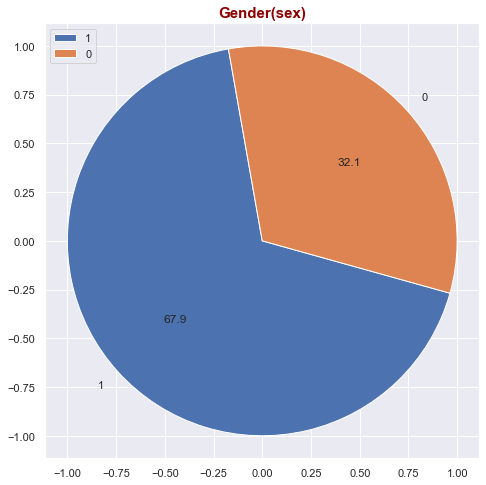

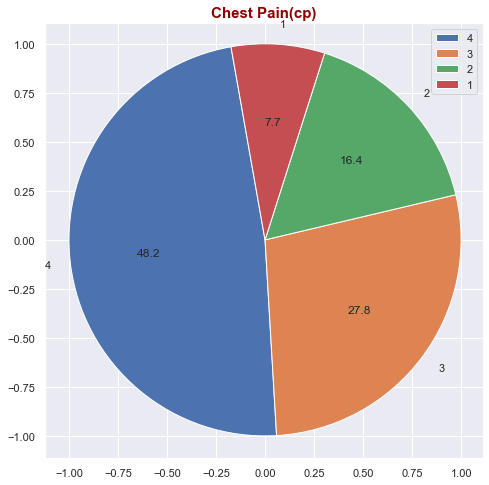

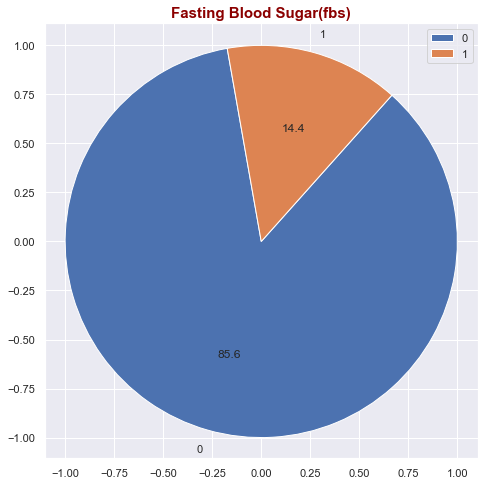

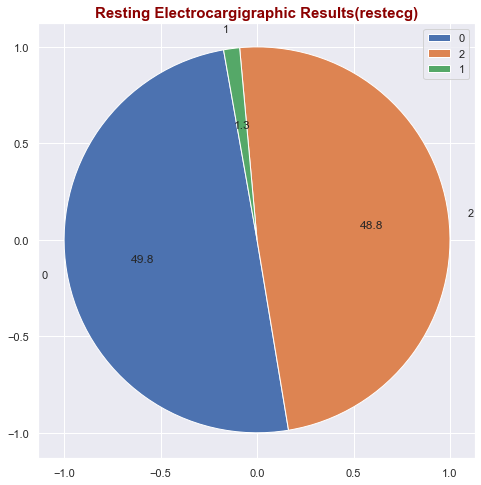

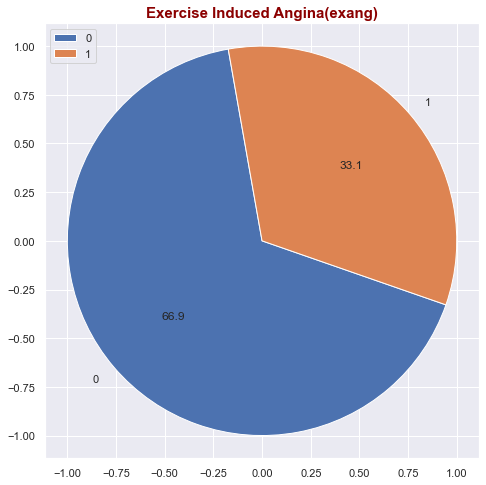

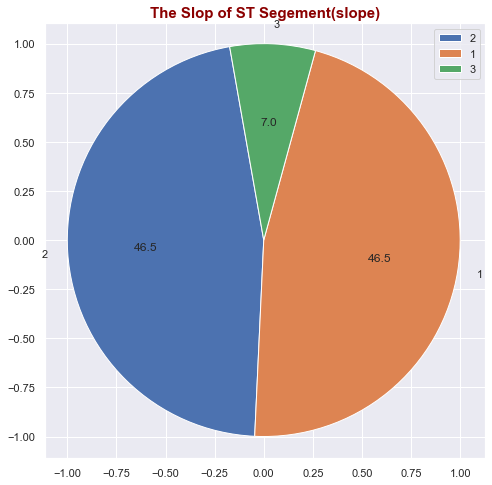

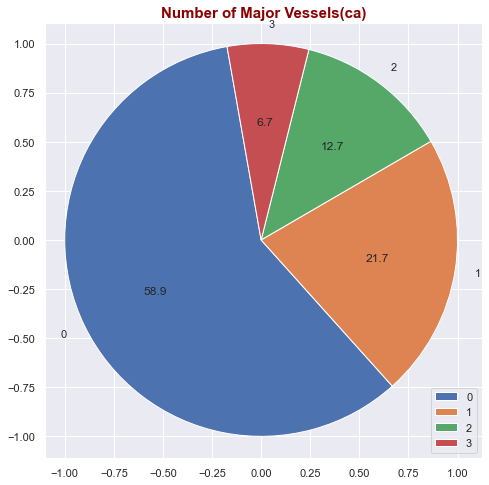

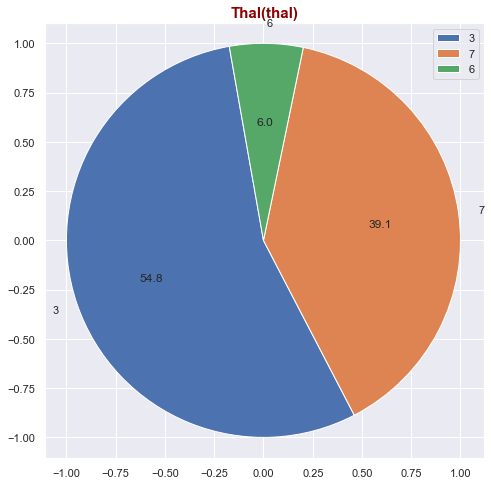

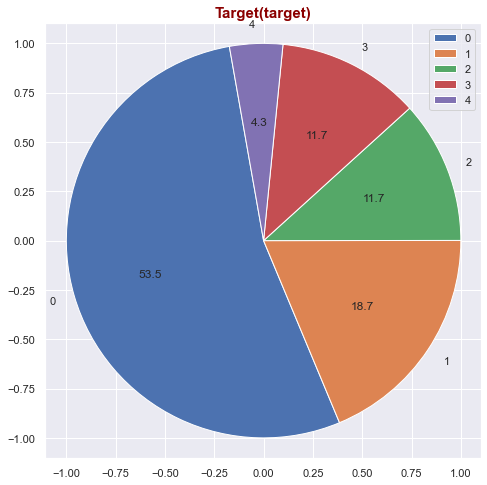

In [72]:
title_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}
for i , z in list(zip(categorical_var,categoric_axis_name)):
    fig,ax = plt.subplots(figsize=(8,8))
    observation_index = list(final_hd[i].value_counts().index)
    observation_values = list(final_hd[i].value_counts())
    ax.pie(observation_values,labels=observation_index,autopct='%1.1f',startangle=100,frame=True)
    plt.title(z + "("+i+")",fontdict=title_font)
    plt.legend()
    

#### What is the outcome of the plotting and analysis of Numerical Data?
 * fglfkjgkljdfg
 * fjglkfjlkdfj
 * fgjlfgjldfj

#### What is the outcome of the plotting and analysis of Categorical Data?
 * fglfkjgkljdfg
 * fjglkfjlkdfj
 * fgjlfgjldfj

#### 3.2 Bivariate Analysis <a id=10></a>

##### 3.2.1 Correlation matrix of continuous features

##### 3.2.2 Scatterplot heatmap of dataframe

##### 3.2.3 Distribution of continuous features according to target variable

##### 3.2.4 Some other relations that seemed intuitive

##### 3.2.5 Pairplot according to target variable - one plot to rule them all

### 4. Data Preprocessing <a id=11></a>

#### 4.1 Conclusions from the EDA <a id=12></a>


#### 4.2 Packages <a id=13></a>


#### 4.3 Making features model ready <a id=14></a>

##### 4.3.1 Scaling and Encoding features

##### 4.3.2 Train and test split

### 5. Modeling <a id=15></a>

#### 5.1 Linear Classifiers <a id=16></a>

##### 5.1.1 Support Vector Machines

##### 5.1.2 Hyperparameter tuning of SVC

##### 5.1.3 Logistic Regression

#### 5.2 Tree Models <a id=17></a>

##### 5.2.1 Decision Tree

##### 5.2.2 Random Forest

#### Conclusion on Algorithms and final outcome